# Importar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rawid = pd.read_csv("C:/Users/User/Desktop/PruebaFinal/BASE_ID.txt", sep = "\t")

In [41]:
rawmovimientos = pd.read_csv("C:/Users/User/Desktop/PruebaFinal/BASE_MOVIMIENTOS_Copy.txt", sep = "\t")

In [5]:
rawmovimientos.shape

(31440, 15)

In [6]:
rawid.shape

(2500, 8)

# Análisis exploratorio y limpieza

## Id Dataset

In [4]:
rawid.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,"1,00",sep301996,19300823,F,CASADO,otros,1.0,2.0
1,"2,00",may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,"3,00",dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,"4,00",ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,"5,00",jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


In [127]:
rawid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 10 columns):
FECHA_ALTA           2500 non-null object
FECHA_NACIMIENTO     2500 non-null object
SEXO                 2500 non-null object
ESTADO_CIVIL         2482 non-null object
SITUACION_LABORAL    2500 non-null object
fuga                 2500 non-null int64
MES_DE_FUGA          2500 non-null int64
AÑO_ALTA             2500 non-null int64
MES_ALTA             2500 non-null object
DIA_ALTA             2500 non-null object
dtypes: int64(3), object(7)
memory usage: 214.8+ KB


In [7]:
rawid[rawid["ESTADO_CIVIL"].isna()]

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
124,"125,00",sep121997,0001-01-01,Mujer,NaN,desconocido,NaN,NaN
149,"150,00",may211997,0001-01-01,M,NaN,temporal,NaN,NaN
677,"678,00",feb272002,0001-01-01,Masc.,NaN,SIN CLASIFICAR,NaN,NaN
687,"688,00",feb272002,0001-01-01,femenino,NaN,SIN CLASIFICAR,1.0,3.0
710,"711,00",sep072005,20050722,Masc.,NaN,otros,NaN,NaN
747,"748,00",feb272002,0001-01-01,mujer,NaN,OTROS,NaN,NaN
755,"756,00",feb272002,19300901,Hombre,NaN,desconocido,NaN,NaN
758,"759,00",feb272002,0001-01-01,M,NaN,SIN CLASIFICAR,NaN,NaN
775,"776,00",feb272002,19390922,MUJER,NaN,desconocido,NaN,NaN
781,"782,00",feb272002,0001-01-01,FEMENINO,NaN,SIN CLASIFICAR,NaN,NaN


In [9]:
rawid[["fuga","MES_DE_FUGA"]] = rawid[["fuga","MES_DE_FUGA"]].fillna(0) 
rawid[["fuga","MES_DE_FUGA"]] = rawid[["fuga","MES_DE_FUGA"]].astype("int64")

In [10]:
rawid['CLIENTE_CC'] = rawid['CLIENTE_CC'].str.replace(',','').astype("int64")
rawid["CLIENTE_CC"] = (rawid["CLIENTE_CC"]/100).astype("int64")

In [11]:
rawid = rawid.rename(columns={"CLIENTE_CC":"ID"})
rawid = rawid.set_index("ID")

In [12]:
rawid["AÑO_ALTA"] = rawid["FECHA_ALTA"].str[5:]
rawid["MES_ALTA"] = rawid["FECHA_ALTA"].str[0:3]
rawid["DIA_ALTA"] = rawid["FECHA_ALTA"].str[3:5]

In [13]:
rawid["AÑO_ALTA"] = rawid["AÑO_ALTA"].astype("int64")
rawidac = rawid.iloc[:,1:8]

In [34]:
rawidac.head()

,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA
ID,,,,,,,
1,19300823,F,CASADO,otros,1,2,1996
2,19530630,HOMBRE,UNION LIBRE,Contrato fijo,0,0,1986
3,19540721,F,UNION LIBRE,OTROS,1,11,1994
4,19390503,M,CASADO,OTROS,0,0,1997
5,19311013,F,CASADO,contrato autonomo.,0,0,1997


In [35]:
rawidac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 7 columns):
FECHA_NACIMIENTO     2500 non-null object
SEXO                 2500 non-null object
ESTADO_CIVIL         2482 non-null object
SITUACION_LABORAL    2500 non-null object
fuga                 2500 non-null int64
MES_DE_FUGA          2500 non-null int64
AÑO_ALTA             2500 non-null int64
dtypes: int64(3), object(4)
memory usage: 156.2+ KB


In [14]:
rawidac = rawidac[rawidac["FECHA_NACIMIENTO"] != "0001-01-01"]

In [15]:
rawidac["FECHA_NACIMIENTO"] = pd.to_datetime(rawidac["FECHA_NACIMIENTO"],format="%Y%m%d")

In [16]:
rawidac["AÑO"] =  rawidac.FECHA_NACIMIENTO.astype(str).str[0:4]
rawidac["AÑO"] = rawidac.AÑO.astype(int)
rawidac["EDAD"] = 2018 - rawidac["AÑO"]

In [17]:
rawidac["SEXO"] = rawidac["SEXO"].str.lower()
rawidac.SEXO.value_counts()

mujer        648
m            460
hombre       351
femenino     311
f            284
masculino    150
masc.        148
varón        135
Name: SEXO, dtype: int64

In [18]:
rawidac["SEXO"] = rawidac.SEXO.replace(["hombre","masculino","masc.","varón","m"],"M")
rawidac["SEXO"] = rawidac.SEXO.replace(["mujer","femenino","f"],"F")


In [19]:
rawidac.ESTADO_CIVIL.value_counts()

SOLTERO        1031
CASADO          799
UNION LIBRE     391
VIUDO           137
SEPARADO         92
DIVORCIADO       31
Name: ESTADO_CIVIL, dtype: int64

In [20]:
rawidac = rawidac.dropna()
rawidac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 1 to 2500
Data columns (total 9 columns):
FECHA_NACIMIENTO     2481 non-null datetime64[ns]
SEXO                 2481 non-null object
ESTADO_CIVIL         2481 non-null object
SITUACION_LABORAL    2481 non-null object
fuga                 2481 non-null int64
MES_DE_FUGA          2481 non-null int64
AÑO_ALTA             2481 non-null int64
AÑO                  2481 non-null int32
EDAD                 2481 non-null int32
dtypes: datetime64[ns](1), int32(2), int64(3), object(3)
memory usage: 174.4+ KB


In [23]:
rawidac["SITUACION_LABORAL"] = rawidac.SITUACION_LABORAL.str.upper()
rawidac.SITUACION_LABORAL.value_counts()

FIJO             1065
OTROS             729
TEMPORAL          437
AUTONOMO          183
DESCONOCIDO        35
SINCLASIFICAR      32
Name: SITUACION_LABORAL, dtype: int64

In [22]:
rawidac.SITUACION_LABORAL = rawidac.SITUACION_LABORAL.str.replace("CONTRATO","")
rawidac.SITUACION_LABORAL = rawidac.SITUACION_LABORAL.str.replace(" ","")
rawidac.SITUACION_LABORAL = rawidac.SITUACION_LABORAL.str.replace(".","")

In [24]:
cleanid = rawidac[["SEXO","ESTADO_CIVIL","SITUACION_LABORAL","fuga","MES_DE_FUGA","AÑO_ALTA","EDAD"]]
cleanid.head()

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD
ID,,,,,,,
1,F,CASADO,OTROS,1,2,1996,88
2,M,UNION LIBRE,FIJO,0,0,1986,65
3,F,UNION LIBRE,OTROS,1,11,1994,64
4,M,CASADO,OTROS,0,0,1997,79
5,F,CASADO,AUTONOMO,0,0,1997,87


## Movimientos Dataset

In [52]:
rawmovimientos.head(26)

SALDO_AHORROS  SALDO_FONDOS  SALDO_CREDITO1  \
ID FECHA_INFORMACION                                                
1  2016-12-01               6977.26           0.0            0.00   
   2017-01-01               5507.00           0.0            0.00   
   2017-02-01               5507.00           0.0            0.00   
   2017-03-01               5507.00           0.0            0.00   
   2017-04-01               5507.00           0.0            0.00   
   2017-05-01               5507.00           0.0            0.00   
   2017-06-01               5507.00           0.0            0.00   
   2017-07-01               5507.00           0.0            0.00   
   2017-08-01               5507.00           0.0            0.00   
   2017-09-01               5507.00           0.0            0.00   
   2017-10-01               5507.00           0.0            0.00   
   2017-11-01               5507.00           0.0            0.00   
   2017-12-01               5507.00           0.0            0.00   
2  2016-12-01                  0.00           0.0      6943852.24   
   2017-01-01                  0.00           0.0      6533627.51   
   2017-02-01                  0.00           0.0      6196762.51   
   2017-03-01                  0.00           0.0      5804461.92   
   2017-04-01                  0.00           0.0      5617390.74   
   2017-05-01                  0.00           0.0      4983237.32   
   2017-06-01                  0.00           0.0      4673149.63   
   2017-07-01                  0.00           0.0      4265860.13   
   2017-08-01                  0.00           0.0      4265860.13   
   2017-09-01                  0.00           0.0      3457250.53   
   2017-10-01                  0.00           0.0      3127724.39   
   2017-11-01                  0.00           0.0      2845157.75   
   2017-12-01                  0.00           0.0      2584011.62   

                      SALDO_CREDITO2  SALDO_TARJETA  MONTO_COMPRAS1  \
ID FECHA_INFORMACION                                                  
1  2016-12-01                    0.0            0.0             0.0   
   2017-01-01                    0.0            0.0             0.0   
   2017-02-01                    0.0            0.0             0.0   
   2017-03-01                    0.0            0.0             0.0   
   2017-04-01                    0.0            0.0             0.0   
   2017-05-01                    0.0            0.0             0.0   
   2017-06-01                    0.0            0.0             0.0   
   2017-07-01                    0.0            0.0             0.0   
   2017-08-01                    0.0            0.0             0.0   
   2017-09-01                    0.0            0.0             0.0   
   2017-10-01                    0.0            0.0             0.0   
   2017-11-01                    0.0            0.0             0.0   
   2017-12-01                    0.0            0.0             0.0   
2  2016-12-01                    0.0      1160000.0             0.0   
   2017-01-01                    0.0      1130000.0             0.0   
   2017-02-01                    0.0      1070000.0             0.0   
   2017-03-01                    0.0      1020000.0             0.0   
   2017-04-01                    0.0       981753.0             0.0   
   2017-05-01                    0.0       905001.0             0.0   
   2017-06-01                    0.0       844078.0             0.0   
   2017-07-01                    0.0       729066.0             0.0   
   2017-08-01                    0.0       729066.0             0.0   
   2017-09-01                    0.0       632965.0             0.0   
   2017-10-01                    0.0       610494.0             0.0   
   2017-11-01                    0.0       569951.0             0.0   
   2017-12-01                    0.0       506015.0             0.0   

                      MONTO_CAJERO1  MONTO_COMPRAS2  MONTO_CAJERO2  \
ID FECHA_INFORMACION          

In [51]:
rawmovimientos = rawmovimientos.set_index(["ID","FECHA_INFORMACION"])
rawmovimientos = rawmovimientos.sort_index()

In [58]:
rawmovimientos = rawmovimientos.reset_index()

In [101]:
rawmovimientos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31440 entries, 1 to 2500
Data columns (total 14 columns):
FECHA_INFORMACION      31440 non-null datetime64[ns]
SALDO_AHORROS          31440 non-null float64
SALDO_FONDOS           31440 non-null float64
SALDO_CREDITO1         31440 non-null float64
SALDO_CREDITO2         31440 non-null float64
SALDO_TARJETA          31440 non-null float64
MONTO_COMPRAS1         31440 non-null float64
MONTO_CAJERO1          31440 non-null float64
MONTO_COMPRAS2         31440 non-null float64
MONTO_CAJERO2          31440 non-null float64
MONTO_ABONOS_NOMINA    31440 non-null float64
INDICADOR_MORA         31440 non-null int64
SALDO_ACTIVO           31440 non-null float64
SALDO_PASIVO           31440 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 3.6 MB


In [44]:
rawmovimientos["FECHA_INFORMACION"] = rawmovimientos.FECHA_INFORMACION.str.lower()


In [45]:
rawmovimientos["FECHA_INFORMACION"] = pd.to_datetime(rawmovimientos["FECHA_INFORMACION"], format="%d%b%Y:%H:%M:%S")

In [46]:
rawmovimientos.SALDO_FONDOS = rawmovimientos["SALDO_FONDOS"].str.replace(".","")
rawmovimientos.SALDO_CREDITO1 = rawmovimientos["SALDO_CREDITO1"].str.replace(".","")
rawmovimientos["SALDO_CREDITO2"] = rawmovimientos["SALDO_CREDITO2"].str.replace(".","")
rawmovimientos["SALDO_ACTIVO"] = rawmovimientos["SALDO_ACTIVO"].str.replace(".","")
rawmovimientos["SALDO_PASIVO"] = rawmovimientos["SALDO_PASIVO"].str.replace(".","")

In [47]:
rawmovimientos.SALDO_FONDOS = rawmovimientos["SALDO_FONDOS"].str.replace(",",".").astype("float64")
rawmovimientos.SALDO_CREDITO1 = rawmovimientos["SALDO_CREDITO1"].str.replace(",",".").astype("float64")
rawmovimientos["SALDO_CREDITO2"] = rawmovimientos["SALDO_CREDITO2"].str.replace(",",".").astype("float64")
rawmovimientos["SALDO_ACTIVO"] = rawmovimientos["SALDO_ACTIVO"].str.replace(",",".").astype("float64")
rawmovimientos["SALDO_PASIVO"] = rawmovimientos["SALDO_PASIVO"].str.replace(",",".").astype("float64")

In [53]:
level_values = rawmovimientos.index.get_level_values
result = (rawmovimientos.groupby([level_values(i) for i in [0]]
                      +[pd.Grouper(freq='3m', level=-1)]).mean())

In [54]:
result.head(10)

SALDO_AHORROS  SALDO_FONDOS  SALDO_CREDITO1  \
ID FECHA_INFORMACION                                                
1  2016-12-31               6977.26           0.0    0.000000e+00   
   2017-03-31               5507.00           0.0    0.000000e+00   
   2017-06-30               5507.00           0.0    0.000000e+00   
   2017-09-30               5507.00           0.0    0.000000e+00   
   2017-12-31               5507.00           0.0    0.000000e+00   
2  2016-12-31                  0.00           0.0    6.943852e+06   
   2017-03-31                  0.00           0.0    6.178284e+06   
   2017-06-30                  0.00           0.0    5.091259e+06   
   2017-09-30                  0.00           0.0    3.996324e+06   
   2017-12-31                  0.00           0.0    2.852298e+06   

                      SALDO_CREDITO2  SALDO_TARJETA  MONTO_COMPRAS1  \
ID FECHA_INFORMACION                                                  
1  2016-12-31                    0.0   0.000000e+00             0.0   
   2017-03-31                    0.0   0.000000e+00             0.0   
   2017-06-30                    0.0   0.000000e+00             0.0   
   2017-09-30                    0.0   0.000000e+00             0.0   
   2017-12-31                    0.0   0.000000e+00             0.0   
2  2016-12-31                    0.0   1.160000e+06             0.0   
   2017-03-31                    0.0   1.073333e+06             0.0   
   2017-06-30                    0.0   9.102773e+05             0.0   
   2017-09-30                    0.0   6.970323e+05             0.0   
   2017-12-31                    0.0   5.621533e+05             0.0   

                      MONTO_CAJERO1  MONTO_COMPRAS2  MONTO_CAJERO2  \
ID FECHA_INFORMACION                                                 
1  2016-12-31                   0.0             0.0            0.0   
   2017-03-31                   0.0             0.0            0.0   
   2017-06-30                   0.0             0.0            0.0   
   2017-09-30                   0.0             0.0            0.0   
   2017-12-31                   0.0             0.0            0.0   
2  2016-12-31                   0.0             0.0            0.0   
   2017-03-31                   0.0             0.0            0.0   
   2017-06-30                   0.0             0.0            0.0   
   2017-09-30                   0.0             0.0            0.0   
   2017-12-31                   0.0             0.0            0.0   

                      MONTO_ABONOS_NOMINA  INDICADOR_MORA  SALDO_ACTIVO  \
ID FECHA_INFORMACION                                                      
1  2016-12-31                         0.0             0.0  0.000000e+00   
   2017-03-31                         0.0             0.0  0.000000e+00   
   2017-06-30                         0.0             0.0  0.000000e+00   
   2017-09-30                         0.0             0.0  0.000000e+00   
   2017-12-31                         0.0             0.0  0.000000e+00   
2  2016-12-31                         0.0             0.0  8.102220e+06   
   2017-03-31                         0.0             0.0  7.248153e+06   
   2017-06-30                         0.0             0.0  6.001537e+06   
   2017-09-30                         0.0             0.0  4.693356e+06   
   2017-12-31                         0.0             0.0  3.414451e+06   

                      SALDO_PASIVO  
ID FECHA_INFORMACION                
1  2016-12-31              6977.26  
   2017-03-31              5507.00  
   2017-06-30              5507.00  
   2017-09-30              5507.00  
   2017-12-31              5507.00  
2  2016-12-31                 0.00  
   2017-03-31                 0.00  
   2017-06-30                 0.00  
   2017-09-30                 0.00  
   2017-12-31                 0.00

In [55]:
movimientosclean = result.copy(deep=True)

In [60]:
movimientosclean = movimientosclean.reset_index()
movimientosclean.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,1,2016-12-31,6977.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6977.26
1,1,2017-03-31,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5507.00
2,1,2017-06-30,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5507.00
3,1,2017-09-30,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5507.00
4,1,2017-12-31,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5507.00


In [61]:
columnas = [2,3,4,5,6,13,14]
target1 = movimientosclean[(movimientosclean.iloc[:,columnas]>200000).any(axis=1)]
target2 = movimientosclean[movimientosclean.MONTO_ABONOS_NOMINA > 1000000]

In [62]:
target = pd.concat([target1,target2])

In [63]:
target = target.drop_duplicates()

In [65]:
index = target.ID.unique()

In [100]:
target.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO,TMORA
5,2,2016-12-31,0.0,0.0,6.943852e+06,0.0,1.160000e+06,0.0,0.0,0.0,0.0,0.0,0.0,8.102220e+06,0.0,False
6,2,2017-03-31,0.0,0.0,6.178284e+06,0.0,1.073333e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.248153e+06,0.0,False
7,2,2017-06-30,0.0,0.0,5.091259e+06,0.0,9.102773e+05,0.0,0.0,0.0,0.0,0.0,0.0,6.001537e+06,0.0,False
8,2,2017-09-30,0.0,0.0,3.996324e+06,0.0,6.970323e+05,0.0,0.0,0.0,0.0,0.0,0.0,4.693356e+06,0.0,False
9,2,2017-12-31,0.0,0.0,2.852298e+06,0.0,5.621533e+05,0.0,0.0,0.0,0.0,0.0,0.0,3.414451e+06,0.0,False


# Variables derivadas

In [119]:
prom_men_sal_ahor =  target[["ID","SALDO_AHORROS"]]
prom_men_sal_ahor = prom_men_sal_ahor.groupby("ID").mean()

In [70]:
prom_men_sal_fon = target[["ID","SALDO_FONDOS"]].groupby("ID").mean()

In [71]:
max_sald_credt_1 = target[["ID","SALDO_CREDITO1"]].groupby("ID").max()
max_sald_credt_1.head()

,SALDO_CREDITO1
ID,
2,6943852.24
3,2619233.32
4,0.00
5,0.00
6,0.00


In [72]:
def rango(serie):
    return serie.max()-serie.min()

In [73]:
range_sald_credt_1 = target[["ID","SALDO_CREDITO1"]].groupby("ID").agg(rango)
range_sald_credt_1.head()

,SALDO_CREDITO1
ID,
2,4.091554e+06
3,1.915240e+06
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00


In [74]:
max_sald_credt_2 = target[["ID","SALDO_CREDITO2"]].groupby("ID").max()
max_sald_credt_2.head()

,SALDO_CREDITO2
ID,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [75]:
range_sald_credt_2 = target[["ID","SALDO_CREDITO2"]].groupby("ID").agg(rango)
range_sald_credt_2.head()

,SALDO_CREDITO2
ID,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [76]:
prom_men_sal_tarj = target[["ID","SALDO_TARJETA"]].groupby("ID").mean()
prom_men_sal_tarj.head()

,SALDO_TARJETA
ID,
2,880559.266667
3,0.000000
4,0.000000
5,0.000000
6,0.000000


In [78]:
prom_men_com_1 = target[["ID","MONTO_COMPRAS1"]].groupby("ID").mean()
prom_men_com_1.head()

,MONTO_COMPRAS1
ID,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [80]:
prom_men_caj_1 = target[["ID","MONTO_CAJERO1"]].groupby("ID").mean()
prom_men_caj_1.head()

,MONTO_CAJERO1
ID,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [83]:
prom_men_com_2 = target[["ID","MONTO_COMPRAS2"]].groupby("ID").mean()
prom_men_com_2.head()

,MONTO_COMPRAS2
ID,
2,0.0
3,0.0
4,494710.0
5,0.0
6,0.0


In [84]:
prom_men_caj_2 = target[["ID","MONTO_CAJERO2"]].groupby("ID").mean()
prom_men_caj_2.head()

,MONTO_CAJERO2
ID,
2,0.000000e+00
3,0.000000e+00
4,1.615333e+06
5,0.000000e+00
6,1.571667e+06


In [88]:
prom_tri_ab_nom = target[["ID","FECHA_INFORMACION","MONTO_ABONOS_NOMINA"]]
prom_tri_ab_nom.index = pd.DatetimeIndex(prom_tri_ab_nom.FECHA_INFORMACION)
prom_tri_ab_nom = prom_tri_ab_nom.set_index(prom_tri_ab_nom.index).groupby('ID').resample('Q').mean()
prom_tri_ab_nom = prom_tri_ab_nom.reset_index(level=0,drop=True)

In [93]:
prom_tri_ab_nom = prom_tri_ab_nom.reset_index()

In [97]:
prom_tri_ab_nom = prom_tri_ab_nom[["ID","MONTO_ABONOS_NOMINA"]].groupby("ID").mean()
prom_tri_ab_nom.head()

,MONTO_ABONOS_NOMINA
ID,
2.0,0.000000e+00
3.0,0.000000e+00
4.0,1.419095e+06
5.0,0.000000e+00
6.0,1.311976e+06


In [99]:
target["TMORA"] = target.INDICADOR_MORA > 0

In [102]:
periodos_mora = target[["ID","TMORA"]].groupby("ID").sum()
periodos_mora.head()

,TMORA
ID,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


In [103]:
periodos_mora.describe()

,TMORA
count,2443.000000
mean,0.087597
std,0.436488
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


# Construcción del DataFrame final

In [106]:
cleanid.head()

,ID,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD
0,1,F,CASADO,OTROS,1,2,1996,88
1,2,M,UNION LIBRE,FIJO,0,0,1986,65
2,3,F,UNION LIBRE,OTROS,1,11,1994,64
3,4,M,CASADO,OTROS,0,0,1997,79
4,5,F,CASADO,AUTONOMO,0,0,1997,87


In [105]:
cleanid = cleanid.reset_index()

In [120]:
Dataset = cleanid.merge(prom_men_sal_ahor, on="ID",how="inner")

In [130]:
Dataset = Dataset.merge(prom_men_sal_fon, on="ID",how="inner")

In [136]:
Dataset = Dataset.merge(max_sald_credt_1, on="ID",how="inner")

In [140]:
Dataset = Dataset.merge(range_sald_credt_1, on="ID",how="inner")

In [144]:
Dataset = Dataset.merge(max_sald_credt_2, on="ID",how="inner")

In [148]:
Dataset = Dataset.merge(range_sald_credt_2, on="ID",how="inner")

In [152]:
Dataset = Dataset.merge(prom_men_sal_tarj, on="ID",how="inner")

In [156]:
Dataset = Dataset.merge(prom_men_com_1, on="ID",how="inner")

In [160]:
Dataset = Dataset.merge(prom_men_caj_1, on="ID",how="inner")

In [164]:
Dataset = Dataset.merge(prom_men_com_2, on="ID",how="inner")

In [168]:
Dataset = Dataset.merge(prom_men_caj_2, on="ID",how="inner")

In [172]:
Dataset = Dataset.merge(prom_tri_ab_nom, on="ID",how="inner")

In [636]:
Dataset = Dataset.merge(pmora, on="ID",how="inner")

In [177]:
nombres = ['ID', 'SEXO', 'ESTADO_CIVIL', 'SITUACION_LABORAL', 'fuga',
       'MES_DE_FUGA', 'AÑO_ALTA', 'EDAD', 'PROMEDIO_MENSUAL_AHORROS',"PROMEDIO_MENSUAL_FONDOS","SALDO_MAXIMO_CREDT1","RANGO_SALDO_CREDT1","SALDO_MAXIMO_CREDT2","RANGO_SALDO_CREDT2","PROMEDIO_MENSUAL_SAL_TART","PROMEDIO_MENSUAL_COMP1","PROMEDIO_MENSUAL_CAJ1","PROMEDIO_MENSUAL_COMP2","PROMEDIO_MENSUAL_CAJ2","PROM_TRIMESTRAL_ABONO_NOM","PERIODOS_MORA"]

In [178]:
Dataset.columns = nombres


In [641]:
Dataset.head()

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,...,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA
ID,,,,,,,,,,,,,,,,,,,,,
2,M,UNION LIBRE,FIJO,0,0,1986,65,0.000000,0.0,6943852.24,...,0.0,0.0,880559.266667,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
3,F,UNION LIBRE,OTROS,1,11,1994,64,3340.000000,0.0,2619233.32,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
4,M,CASADO,OTROS,0,0,1997,79,693888.400000,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,494710.0,1.615333e+06,1.419095e+06,0.0,0
5,F,CASADO,AUTONOMO,0,0,1997,87,180375.533333,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
6,F,CASADO,OTROS,1,11,1997,77,161397.050000,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.571667e+06,1.311976e+06,0.0,0


In [638]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 2 to 2500
Data columns (total 21 columns):
SEXO                         2424 non-null category
ESTADO_CIVIL                 2424 non-null category
SITUACION_LABORAL            2424 non-null category
fuga                         2424 non-null int64
MES_DE_FUGA                  2424 non-null int64
AÑO_ALTA                     2424 non-null int64
EDAD                         2424 non-null int32
PROMEDIO_MENSUAL_AHORROS     2424 non-null float64
PROMEDIO_MENSUAL_FONDOS      2424 non-null float64
SALDO_MAXIMO_CREDT1          2424 non-null float64
RANGO_SALDO_CREDT1           2424 non-null float64
SALDO_MAXIMO_CREDT2          2424 non-null float64
RANGO_SALDO_CREDT2           2424 non-null float64
PROMEDIO_MENSUAL_SAL_TART    2424 non-null float64
PROMEDIO_MENSUAL_COMP1       2424 non-null float64
PROMEDIO_MENSUAL_CAJ1        2424 non-null float64
PROMEDIO_MENSUAL_COMP2       2424 non-null float64
PROMEDIO_MENSUAL_CAJ2        24

In [181]:
categoricas = ["SEXO","ESTADO_CIVIL","SITUACION_LABORAL","fuga"]

In [216]:
Dataset["fuga"] = Dataset.fuga.astype("int64")

In [182]:
Dataset[categoricas] = Dataset[categoricas].astype("category")

In [640]:
Dataset = Dataset.reset_index()
Dataset = Dataset.set_index("ID")

# Ultimo arreglo

In [642]:
DatasetClean = Dataset[(Dataset["EDAD"] >= 18) & (Dataset["EDAD"] <= 95)].copy()
DatasetClean.EDAD.describe()

count    2399.000000
mean       48.748645
std        16.849768
min        18.000000
25%        34.000000
50%        47.000000
75%        62.000000
max        94.000000
Name: EDAD, dtype: float64

In [643]:
DataAnalisis = Dataset[(Dataset["EDAD"] >= 18) & (Dataset["EDAD"] <= 95)].copy()

In [267]:
for elem in DatasetClean["SITUACION_LABORAL"].unique():
    DatasetClean[str(elem)] = DatasetClean['SITUACION_LABORAL'] == elem

In [382]:
for elem in DatasetClean["ESTADO_CIVIL"].unique():
    DatasetClean[str(elem)] = DatasetClean['ESTADO_CIVIL'] == elem

In [383]:
for elem in DatasetClean["SEXO"].unique():
    DatasetClean[str(elem)] = DatasetClean['SEXO'] == elem

In [385]:
DatasetClean[["UNION LIBRE","CASADO","SOLTERO","DIVORCIADO","VIUDO","SEPARADO","M","F"]] = DatasetClean[["UNION LIBRE","CASADO","SOLTERO","DIVORCIADO","VIUDO","SEPARADO","M","F"]].astype("int64")

In [645]:
DatasetClean1 = DatasetClean.copy()
DatasetClean1 = DatasetClean1.drop(["MES_DE_FUGA","SEXO","ESTADO_CIVIL","SITUACION_LABORAL","PERIODOS_MORA"], axis=1)
DatasetClean1.head()

,fuga,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,INDICADOR_MORA
ID,,,,,,,,,,,,,,,,
2,0,1986,65,0.000000,0.0,6943852.24,4.091554e+06,0.0,0.0,880559.266667,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0
3,1,1994,64,3340.000000,0.0,2619233.32,1.915240e+06,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0
4,0,1997,79,693888.400000,0.0,0.00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,494710.0,1.615333e+06,1.419095e+06,0
5,0,1997,87,180375.533333,0.0,0.00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0
6,1,1997,77,161397.050000,0.0,0.00,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,1.571667e+06,1.311976e+06,0


In [330]:
from imblearn.over_sampling import SMOTE

In [646]:
X = DatasetClean1.loc[:, DatasetClean1.columns != 'fuga']
y = DatasetClean1.loc[:, DatasetClean1.columns == 'fuga']


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['fuga'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['fuga']==0]))
print("Number of subscription",len(os_data_y[os_data_y['fuga']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['fuga']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['fuga']==1])/len(os_data_X))

length of oversampled data is  2444
Number of no subscription in oversampled data 1222
Number of subscription 1222
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prueba de modelo

## Arbol de decision

In [190]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [647]:
y = os_data_y

In [648]:
y.head()

,fuga
0,0
1,1
2,0
3,1
4,0


In [649]:
x = os_data_X
x.head()

,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,INDICADOR_MORA
0,2012.0,36.0,5.825094e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.620667e+06,107277.333333,970666.666667,0.000000,1.000000e+06,1.073159e+06,0.0
1,2016.0,24.0,3.635809e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,2681.666667,1.378333e+06,1.565580e+06,0.0
2,2014.0,32.0,0.000000e+00,0.0,1.853103e+06,1.501325e+06,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
3,2016.0,44.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,8.930000e+06,147115.933333,0.000000,0.000000,0.000000e+00,0.000000e+00,4.0
4,1997.0,44.0,1.072018e+06,0.0,9.592632e+06,8.376694e+06,0.0,0.0,2.387127e+06,792607.800000,0.000000,489737.866667,9.100000e+05,1.860000e+06,0.0


In [650]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [651]:
ClasificadorFuga = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
ClasificadorFuga.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [652]:
predictions = ClasificadorFuga.predict(X_test)

In [653]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7645600991325898

## Regresión logística

In [312]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [347]:
import statsmodels.api as sm


In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [654]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [655]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


## Arbol con edad y sin el resto de las variables demográficas

In [656]:
x = x.iloc[:,0:15]
x.head()

,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,INDICADOR_MORA
0,2012.0,36.0,5.825094e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.620667e+06,107277.333333,970666.666667,0.000000,1.000000e+06,1.073159e+06,0.0
1,2016.0,24.0,3.635809e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,2681.666667,1.378333e+06,1.565580e+06,0.0
2,2014.0,32.0,0.000000e+00,0.0,1.853103e+06,1.501325e+06,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
3,2016.0,44.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,8.930000e+06,147115.933333,0.000000,0.000000,0.000000e+00,0.000000e+00,4.0
4,1997.0,44.0,1.072018e+06,0.0,9.592632e+06,8.376694e+06,0.0,0.0,2.387127e+06,792607.800000,0.000000,489737.866667,9.100000e+05,1.860000e+06,0.0


In [657]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [658]:
ClasificadorFuga = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
ClasificadorFuga.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [659]:
predictions = ClasificadorFuga.predict(X_test)

In [660]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7645600991325898

## Arbol con edad y situación laboral

In [661]:
x = x.iloc[:,0:21]
x.head()

,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,INDICADOR_MORA
0,2012.0,36.0,5.825094e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.620667e+06,107277.333333,970666.666667,0.000000,1.000000e+06,1.073159e+06,0.0
1,2016.0,24.0,3.635809e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,2681.666667,1.378333e+06,1.565580e+06,0.0
2,2014.0,32.0,0.000000e+00,0.0,1.853103e+06,1.501325e+06,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0
3,2016.0,44.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,8.930000e+06,147115.933333,0.000000,0.000000,0.000000e+00,0.000000e+00,4.0
4,1997.0,44.0,1.072018e+06,0.0,9.592632e+06,8.376694e+06,0.0,0.0,2.387127e+06,792607.800000,0.000000,489737.866667,9.100000e+05,1.860000e+06,0.0


In [662]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [663]:
ClasificadorFuga = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
ClasificadorFuga.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [664]:
predictions = ClasificadorFuga.predict(X_test)

In [665]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7645600991325898

## Análisis de relaciones entre variables predictores y target

In [667]:
DataAnalisis.head()

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,...,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA
ID,,,,,,,,,,,,,,,,,,,,,
2,M,UNION LIBRE,FIJO,0,0,1986,65,0.000000,0.0,6943852.24,...,0.0,0.0,880559.266667,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
3,F,UNION LIBRE,OTROS,1,11,1994,64,3340.000000,0.0,2619233.32,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
4,M,CASADO,OTROS,0,0,1997,79,693888.400000,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,494710.0,1.615333e+06,1.419095e+06,0.0,0
5,F,CASADO,AUTONOMO,0,0,1997,87,180375.533333,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0
6,F,CASADO,OTROS,1,11,1997,77,161397.050000,0.0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.571667e+06,1.311976e+06,0.0,0


### Situación laboral vs Fuga

In [420]:
def agregador (serie):
    return sum(serie)/len(serie)

In [423]:
Analisislaboralfuga = DataAnalisis[["SITUACION_LABORAL","fuga"]].groupby("SITUACION_LABORAL").agg(agregador)

In [426]:
Analisislaboralfuga = Analisislaboralfuga.reset_index()

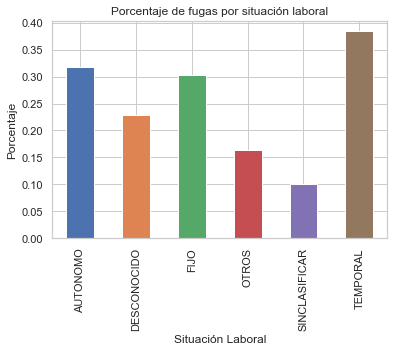

<Figure size 432x288 with 0 Axes>

In [438]:
Analisislaboralfuga.plot(x="SITUACION_LABORAL",y="fuga",kind='bar', legend=False)
plt.title('Porcentaje de fugas por situación laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Porcentaje')
plt.show()
plt.savefig("Bar_plot.png")

### Año de alta vs Fuga

In [679]:
DataAnalisis["Permanencia"] = 2017 - DataAnalisis["AÑO_ALTA"] 

In [614]:
DataAnalisis.Permanencia.describe()

count    2399.000000
mean        9.376824
std         6.785445
min         1.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        47.000000
Name: Permanencia, dtype: float64

In [621]:
analisisañoaltafuga = DataAnalisis[["Permanencia","fuga"]].groupby("Permanencia").agg(agregador)
analisisañoaltafuga = analisisañoaltafuga.reset_index()

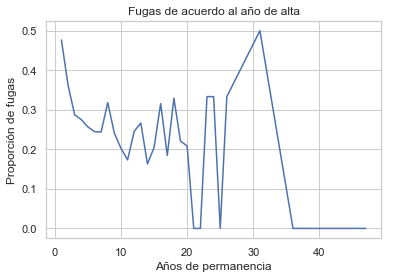

In [622]:
analisisañoaltafuga.plot(x="Permanencia",y="fuga" , legend=False)
plt.title('Fugas de acuerdo al año de alta')
plt.xlabel('Años de permanencia')
plt.ylabel('Proporción de fugas')
plt.show()

In [619]:
analisisañoaltafuga = DataAnalisis[["Permanencia","fuga"]].groupby("Permanencia").sum()
analisisañoaltafuga = analisisañoaltafuga.reset_index()

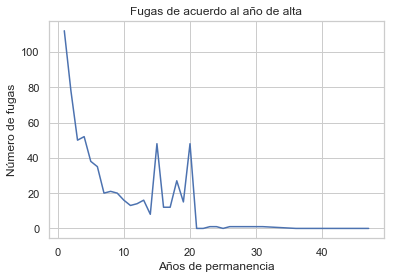

In [620]:
analisisañoaltafuga.plot(x="Permanencia",y="fuga" , legend=False)
plt.title('Fugas de acuerdo al año de alta')
plt.xlabel('Años de permanencia')
plt.ylabel('Número de fugas')
plt.show()

### Fugas vs edad

In [454]:
fugaedad = DataAnalisis[["EDAD","fuga"]].groupby("EDAD").sum()
fugaedad = fugaedad.reset_index()

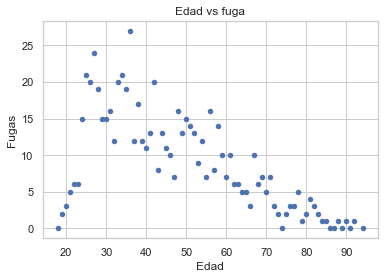

In [615]:
fugaedad.plot(x="EDAD",y="fuga",kind="scatter")
plt.title('Edad vs fuga')
plt.xlabel('Edad')
plt.ylabel('Fugas')
plt.show()

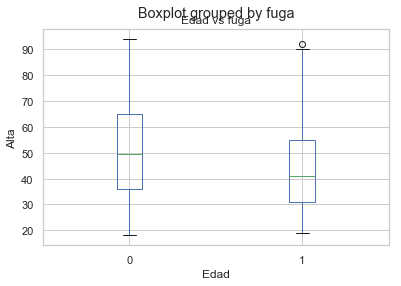

In [472]:
DataAnalisis.boxplot(column="EDAD",by="fuga")
plt.title('Edad vs fuga')
plt.xlabel('Edad')
plt.ylabel('Alta')
plt.show()

### Promedio mensual ahorros vs Fuga

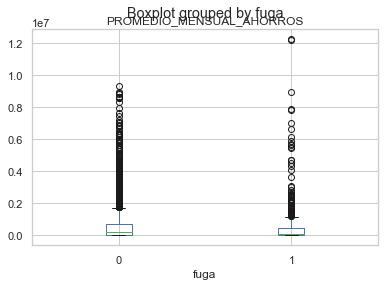

In [473]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_AHORROS", by="fuga")
plt.show()

In [477]:
DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]>10000000]

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,...,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,Permanencia
ID,,,,,,,,,,,,,,,,,,,,,
927,M,SEPARADO,DESCONOCIDO,1,6,2005,33,1.226481e+07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,265000.0,200000.0,0.0,0.0,12
2488,M,SOLTERO,TEMPORAL,1,3,2016,31,1.220040e+07,0.0,18000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [479]:
ahorrosfuga = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]<10000000]
ahorrosfuga = ahorrosfuga[["PROMEDIO_MENSUAL_AHORROS","fuga"]].groupby("fuga").mean()

In [480]:
ahorrosfuga.head()

,PROMEDIO_MENSUAL_AHORROS
fuga,
0,731588.906165
1,460171.739433


In [540]:
ahorrosfugamedi = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]<10000000]
ahorrosfugamedi = ahorrosfugamedi[["PROMEDIO_MENSUAL_AHORROS","fuga"]].groupby("fuga").median()

In [541]:
ahorrosfugamedi

,PROMEDIO_MENSUAL_AHORROS
fuga,
0,231123.517333
1,121365.613333


In [538]:
sinahorros = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]==0]
sinahorros = sinahorros.fuga.sum() /len(sinahorros)
sinahorros

0.32235294117647056

In [539]:
conahorros = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]!=0]
conahorros = conahorros.fuga.sum() /len(conahorros)
conahorros

0.26443768996960487

In [487]:
ahorrosfugamedi.head()

,PROMEDIO_MENSUAL_AHORROS
fuga,
0,231123.517333
1,121365.613333


In [493]:
rangosahorrofuga = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_AHORROS"]<10000000]
rangosahorrofuga = rangosahorrofuga[["PROMEDIO_MENSUAL_AHORROS","fuga"]]
rangosahorrofuga.PROMEDIO_MENSUAL_AHORROS = rangosahorrofuga.PROMEDIO_MENSUAL_AHORROS.astype("int64")
rangosahorrofuga.PROMEDIO_MENSUAL_AHORROS.describe()

count    2.397000e+03
mean     6.571951e+05
std      1.276053e+06
min      0.000000e+00
25%      1.150000e+04
50%      1.901260e+05
75%      6.401580e+05
max      9.364000e+06
Name: PROMEDIO_MENSUAL_AHORROS, dtype: float64

In [526]:
first = rangosahorrofuga[(rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]>=0) & (rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]<11500)]
first = first.fuga.sum() / len(first)

In [528]:
second = rangosahorrofuga[(rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]>=11500) & (rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]<190126)]
second = second.fuga.sum()/ len(second)

In [529]:
third = rangosahorrofuga[(rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]>=190126) & (rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]<640158)]
third = third.fuga.sum()/ len(third)

In [530]:
fouth = rangosahorrofuga[(rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]>=640158) & (rangosahorrofuga["PROMEDIO_MENSUAL_AHORROS"]<9700000)]
fouth = fouth.fuga.sum()/ len(fouth)

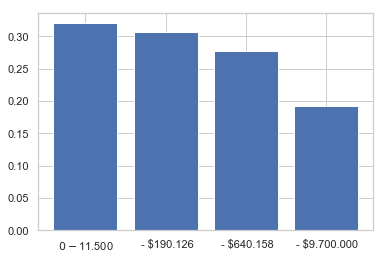

In [533]:
analisisfugamensual = [first,second,third,fouth]
xaxis = ["$0 - $11.500"," - $190.126"," - $640.158"," - $9.700.000"]
plt.bar(x=xaxis,height= analisisfugamensual)
plt.show()

### Promedio mensual fondos vs Fuga

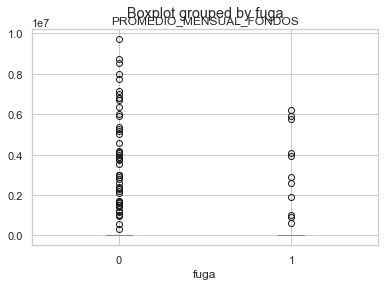

In [534]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_FONDOS", by="fuga")
plt.show()

In [543]:
fondosfugamean = DataAnalisis[["PROMEDIO_MENSUAL_FONDOS","fuga"]].groupby("fuga").mean()
fondosfugamean

,PROMEDIO_MENSUAL_FONDOS
fuga,
0,117514.605686
1,54383.147076


In [544]:
fondosfugamedian = DataAnalisis[["PROMEDIO_MENSUAL_FONDOS","fuga"]].groupby("fuga").median()
fondosfugamedian

,PROMEDIO_MENSUAL_FONDOS
fuga,
0,0.0
1,0.0


In [549]:
DataAnalisis["Fondos"] = DataAnalisis["PROMEDIO_MENSUAL_FONDOS"] > 0

In [550]:
DataAnalisis["Tfondos"] = DataAnalisis["Fondos"].map({True:"Tiene",False:"No Tiene"})

In [554]:
conteoporfondo = DataAnalisis[["Tfondos","fuga"]].groupby("Tfondos").agg(agregador)

In [555]:
conteoporfondo

,fuga
Tfondos,
No Tiene,0.277635
Tiene,0.169231


In [557]:
fondofuga = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_FONDOS"] > 0]
fondofuga = fondofuga[["PROMEDIO_MENSUAL_FONDOS","fuga"]].groupby("fuga").count()

In [558]:
fondofuga

,PROMEDIO_MENSUAL_FONDOS
fuga,
0,54
1,11


#### Fuga vs Saldo máximo credito 1

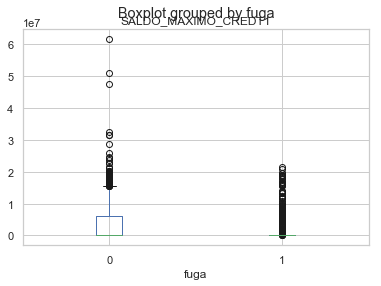

In [559]:
DataAnalisis.boxplot(column="SALDO_MAXIMO_CREDT1", by="fuga")
plt.show()

In [560]:
fugacred1mean = DataAnalisis[["SALDO_MAXIMO_CREDT1","fuga"]].groupby("fuga").mean()
fugacred1mean

,SALDO_MAXIMO_CREDT1
fuga,
0,3.489351e+06
1,1.506465e+06


In [565]:
maxcred1fuga = DataAnalisis[DataAnalisis["SALDO_MAXIMO_CREDT1"] > 0]
maxcred1fuga = maxcred1fuga[["SALDO_MAXIMO_CREDT1","fuga"]].groupby("fuga").count()

In [566]:
maxcred1fuga

,SALDO_MAXIMO_CREDT1
fuga,
0,649
1,138


### Fuga vs Saldo máximo credito 2

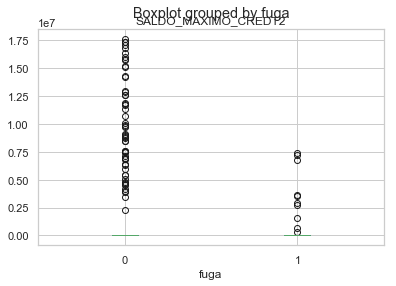

In [567]:
DataAnalisis.boxplot(column="SALDO_MAXIMO_CREDT2", by="fuga")
plt.show()

In [569]:
fugacred2mean = DataAnalisis[["SALDO_MAXIMO_CREDT2","fuga"]].groupby("fuga").mean()
fugacred2mean

,SALDO_MAXIMO_CREDT2
fuga,
0,318120.875155
1,55586.482367


In [570]:
maxcred2fuga = DataAnalisis[DataAnalisis["SALDO_MAXIMO_CREDT2"] > 0]
maxcred2fuga = maxcred2fuga[["SALDO_MAXIMO_CREDT2","fuga"]].groupby("fuga").count()

In [571]:
maxcred2fuga

,SALDO_MAXIMO_CREDT2
fuga,
0,57
1,10


### Fuga vs Saldo Tarjeta

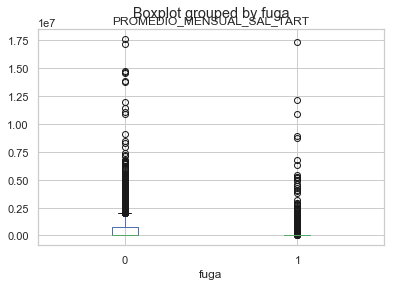

In [572]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_SAL_TART", by="fuga")
plt.show()

In [573]:
fugaSaldTar = DataAnalisis[["PROMEDIO_MENSUAL_SAL_TART","fuga"]].groupby("fuga").mean()
fugaSaldTar

,PROMEDIO_MENSUAL_SAL_TART
fuga,
0,725884.366006
1,400952.879181


In [574]:
futatarjeta = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_SAL_TART"] > 0]
futatarjeta = futatarjeta[["PROMEDIO_MENSUAL_SAL_TART","fuga"]].groupby("fuga").count()

In [575]:
futatarjeta

,PROMEDIO_MENSUAL_SAL_TART
fuga,
0,584
1,138


### Fuga vs compras 

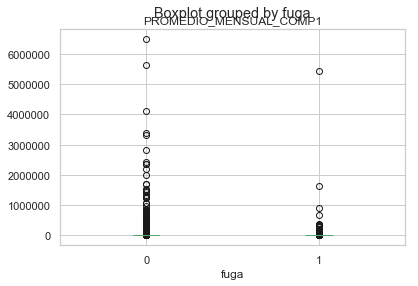

In [576]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_COMP1", by="fuga")
plt.show()

In [577]:
fugacompras1 = DataAnalisis[["PROMEDIO_MENSUAL_COMP1","fuga"]].groupby("fuga").mean()
fugacompras1

,PROMEDIO_MENSUAL_COMP1
fuga,
0,71553.561603
1,23465.209433


In [579]:
fugacompras1 = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_COMP1"] > 0]
fugacompras1 = fugacompras1[["PROMEDIO_MENSUAL_COMP1","fuga"]].groupby("fuga").count()

In [580]:
fugacompras1

,PROMEDIO_MENSUAL_COMP1
fuga,
0,459
1,84


### Fuga vs cajero 1

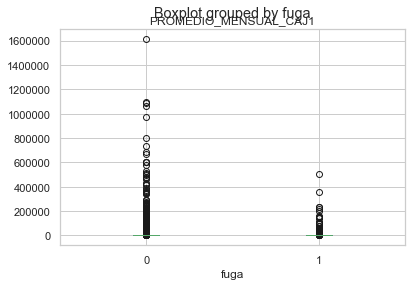

In [582]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_CAJ1", by="fuga")
plt.show()

In [583]:
fugacajero1 = DataAnalisis[["PROMEDIO_MENSUAL_CAJ1","fuga"]].groupby("fuga").mean()
fugacajero1

,PROMEDIO_MENSUAL_CAJ1
fuga,
0,26076.079770
1,5774.135896


In [584]:
fugacajer1 = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_CAJ1"] > 0]
fugacajer1 = fugacajer1[["PROMEDIO_MENSUAL_CAJ1","fuga"]].groupby("fuga").count()

In [585]:
fugacajer1

,PROMEDIO_MENSUAL_CAJ1
fuga,
0,315
1,46


### Fuga vs compras 2

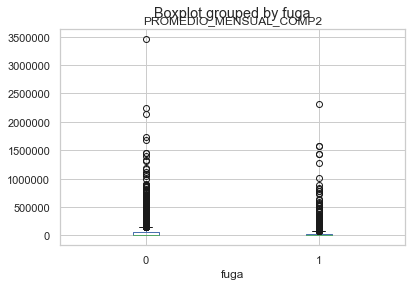

In [586]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_COMP2", by="fuga")
plt.show()

In [587]:
fugacompras2 = DataAnalisis[["PROMEDIO_MENSUAL_COMP2","fuga"]].groupby("fuga").mean()
fugacompras2

,PROMEDIO_MENSUAL_COMP2
fuga,
0,81836.565270
1,66447.005513


In [588]:
fugacompras2 = DataAnalisis[DataAnalisis["PROMEDIO_MENSUAL_COMP2"] > 0]
fugacompras2 = fugacompras2[["PROMEDIO_MENSUAL_COMP2","fuga"]].groupby("fuga").count()
fugacompras2

,PROMEDIO_MENSUAL_COMP2
fuga,
0,876
1,284


### Fugas vs cajeros2

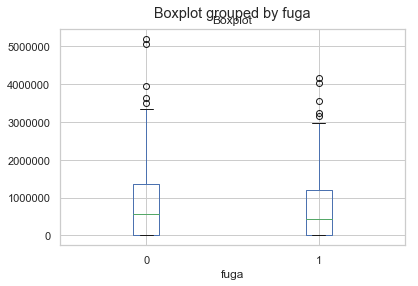

In [701]:
DataAnalisis.boxplot(column="PROMEDIO_MENSUAL_CAJ2", by="fuga")
plt.title("Boxplot")
plt.show()

### Abonos trimestrales vs Fuga

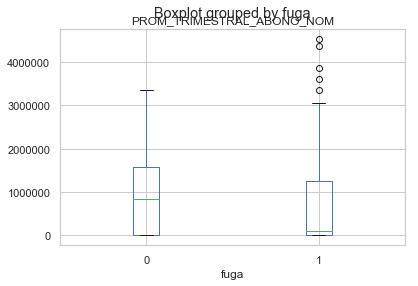

In [590]:
DataAnalisis.boxplot(column="PROM_TRIMESTRAL_ABONO_NOM", by="fuga")
plt.show()

In [591]:
abonosfugas = DataAnalisis[DataAnalisis["PROM_TRIMESTRAL_ABONO_NOM"] > 0]
abonosfugas = abonosfugas[["PROM_TRIMESTRAL_ABONO_NOM","fuga"]].groupby("fuga").count()
abonosfugas

,PROM_TRIMESTRAL_ABONO_NOM
fuga,
0,1055
1,332


### Fuga vs periodos en mora

In [670]:
fugamora = DataAnalisis[["INDICADOR_MORA","fuga"]].groupby("INDICADOR_MORA").agg(agregador)
fugamora

,fuga
INDICADOR_MORA,
0,0.239178
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,1.000000


In [671]:
fugamora = fugamora.reset_index()

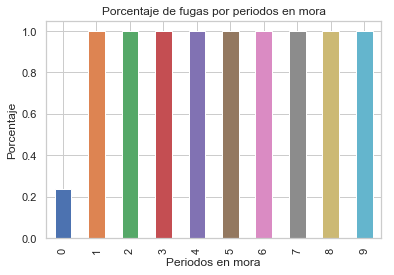

In [672]:
fugamora.plot(x="INDICADOR_MORA",y="fuga",kind='bar', legend=False)
plt.title('Porcentaje de fugas por periodos en mora')
plt.xlabel('Periodos en mora')
plt.ylabel('Porcentaje')
plt.show()

#  Análisis entre otras variables

In [612]:
añoaltaedad = DataAnalisis[["EDAD","Permanencia"]]

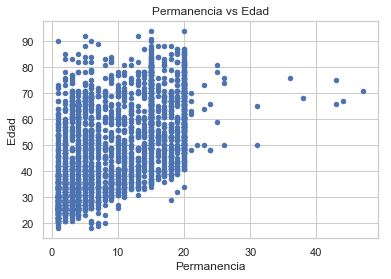

In [613]:
añoaltaedad.plot(x="Permanencia",y="EDAD",kind="scatter")
plt.title('Permanencia vs Edad')
plt.xlabel('Permanencia')
plt.ylabel('Edad')
plt.show()

In [628]:
Datapocosaños2 = DataAnalisis[(DataAnalisis["Permanencia"] == 1) & (DataAnalisis["fuga"] == 0)]
Datapocosaños2.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,Permanencia
count,123.0,123.0,123.0,123.000000,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,123.0,123.0,1.230000e+02,1.230000e+02,123.000000,123.000000,1.230000e+02,1.230000e+02,123.0,123.0
mean,0.0,0.0,2016.0,34.788618,6.232817e+05,1.267021e+05,3.443751e+06,1.197178e+06,0.0,0.0,3.244555e+05,6.357039e+04,18545.784282,86773.960434,8.716374e+05,1.019005e+06,0.0,1.0
std,0.0,0.0,0.0,12.959743,1.334734e+06,8.029817e+05,6.436245e+06,3.634114e+06,0.0,0.0,9.647289e+05,3.961513e+05,70410.026453,157234.688832,7.169429e+05,8.291216e+05,0.0,0.0
min,0.0,0.0,2016.0,18.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,1.0
25%,0.0,0.0,2016.0,26.000000,1.995075e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,8.666667e+03,0.000000e+00,0.0,1.0
50%,0.0,0.0,2016.0,30.000000,1.726987e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,4359.600000,9.213333e+05,1.192933e+06,0.0,1.0
75%,0.0,0.0,2016.0,38.000000,6.018684e+05,0.000000e+00,4.313164e+06,1.037050e+06,0.0,0.0,2.614506e+05,0.000000e+00,0.000000,110725.166667,1.449667e+06,1.696724e+06,0.0,1.0
max,0.0,0.0,2016.0,90.000000,8.585333e+06,7.742084e+06,3.150000e+07,3.150000e+07,0.0,0.0,8.478000e+06,4.106823e+06,601933.333333,643985.933333,2.866667e+06,3.062133e+06,0.0,1.0


In [680]:
Datapocosaños1 = DataAnalisis[(DataAnalisis["Permanencia"] == 1) & (DataAnalisis["fuga"] == 1)]
Datapocosaños1.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA,Permanencia
count,112.0,112.000000,112.0,112.000000,1.120000e+02,112.0,1.120000e+02,1.120000e+02,112.0,112.0,1.120000e+02,112.000000,112.000000,1.120000e+02,1.120000e+02,1.120000e+02,112.000000,112.000000,112.0
mean,1.0,5.875000,2016.0,34.258929,6.432604e+05,0.0,1.820337e+06,6.884155e+05,0.0,0.0,2.956552e+05,4759.689435,6596.626984,1.236212e+05,8.188690e+05,8.787105e+05,0.223214,0.473214,1.0
std,0.0,3.425198,0.0,11.300758,1.478498e+06,0.0,5.215937e+06,2.767646e+06,0.0,0.0,1.467071e+06,26126.179343,33628.285732,2.981828e+05,7.159804e+05,8.829870e+05,0.653608,1.432945,0.0
min,1.0,1.000000,2016.0,19.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,1.0,3.000000,2016.0,26.000000,5.710390e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,4.833333e+04,0.000000e+00,0.000000,0.000000,1.0
50%,1.0,5.000000,2016.0,31.000000,2.662163e+05,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,2.674167e+03,7.950000e+05,9.152740e+05,0.000000,0.000000,1.0
75%,1.0,9.000000,2016.0,39.000000,5.897874e+05,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000,7.942410e+04,1.327500e+06,1.447500e+06,0.000000,0.000000,1.0
max,1.0,12.000000,2016.0,72.000000,1.220040e+07,0.0,2.076529e+07,2.048432e+07,0.0,0.0,1.214000e+07,197949.866667,233933.333333,1.580000e+06,2.640000e+06,4.520000e+06,3.000000,7.000000,1.0


In [682]:
Datavariosaños1 = DataAnalisis[(DataAnalisis["Permanencia"] != 1) & (DataAnalisis["fuga"] == 1)]
Datavariosaños1.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA,Permanencia
count,547.0,547.000000,547.000000,547.000000,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,547.000000,5.470000e+02,5.470000e+02,5.470000e+02,547.000000,547.000000,547.000000
mean,1.0,6.833638,2007.595978,46.038391,4.657274e+05,6.551827e+04,1.442198e+06,6.120979e+05,6.696799e+04,3.583224e+04,4.225129e+05,2.729522e+04,5605.728215,5.474040e+04,6.399955e+05,6.270009e+05,0.345521,0.729433,9.404022
std,0.0,3.465122,6.387905,15.488634,1.156449e+06,5.370558e+05,3.709531e+06,1.991093e+06,5.953970e+05,3.647474e+05,1.327617e+06,2.506220e+05,33848.629304,1.727040e+05,7.604618e+05,7.870807e+05,0.818397,1.788218,6.387905
min,1.0,1.000000,1986.000000,19.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000
25%,1.0,4.000000,2002.000000,34.000000,5.216392e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000
50%,1.0,7.000000,2009.000000,44.000000,9.903307e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.533333e+05,0.000000e+00,0.000000,0.000000,8.000000
75%,1.0,10.000000,2013.000000,56.500000,4.435362e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.461289e+04,1.179583e+06,1.239769e+06,0.000000,0.000000,15.000000
max,1.0,12.000000,2015.000000,92.000000,1.226481e+07,6.201210e+06,2.140000e+07,1.956476e+07,7.405352e+06,6.575317e+06,1.737500e+07,5.430000e+06,505000.000000,2.320000e+06,4.160000e+06,4.360000e+06,4.000000,9.000000,31.000000


In [683]:
Datavariosaños2 = DataAnalisis[(DataAnalisis["Permanencia"] != 1) & (DataAnalisis["fuga"] == 0)]
Datavariosaños2.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA,Permanencia
count,1617.0,1617.0,1617.000000,1617.000000,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1.617000e+03,1617.0,1617.0,1617.000000
mean,0.0,0.0,2006.414966,51.730983,7.398275e+05,1.168157e+05,3.492819e+06,1.552337e+06,3.423193e+05,9.557530e+04,7.564198e+05,7.216082e+04,2.664889e+04,8.146099e+04,7.226223e+05,8.576438e+05,0.0,0.0,10.585034
std,0.0,0.0,6.547549,16.674148,1.350644e+06,7.804409e+05,5.823704e+06,3.890242e+06,1.962766e+06,7.240902e+05,1.725403e+06,3.264937e+05,9.933189e+04,2.160614e+05,7.890417e+05,8.314995e+05,0.0,0.0,6.547549
min,0.0,0.0,1970.000000,18.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2.000000
25%,0.0,0.0,2002.000000,37.000000,2.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,5.000000
50%,0.0,0.0,2007.000000,51.000000,2.349048e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.173333e+05,7.893333e+05,0.0,0.0,10.000000
75%,0.0,0.0,2012.000000,65.000000,7.204657e+05,0.000000e+00,6.285611e+06,1.599012e+06,0.000000e+00,0.000000e+00,9.233367e+05,4.201467e+03,0.000000e+00,5.603053e+04,1.354000e+06,1.554783e+06,0.0,0.0,15.000000
max,0.0,0.0,2015.000000,94.000000,9.364000e+06,9.721800e+06,6.154530e+07,6.154530e+07,1.756400e+07,1.599998e+07,1.760667e+07,6.485333e+06,1.611750e+06,3.455879e+06,5.177358e+06,3.350936e+06,0.0,0.0,47.000000


In [707]:
conmora = DataAnalisis[DataAnalisis["INDICADOR_MORA"] != 0]
conmora.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA,Permanencia
count,112.0,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,1.120000e+02,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,1.120000e+02,112.000000,112.000000,112.000000
mean,1.0,8.008929,2009.428571,41.812500,39321.624944,8928.571429,4.276018e+06,7.350665e+05,6.021215e+04,5956.632500,1.622031e+06,25032.169048,26350.595238,11329.620833,2.451220e+05,2.701646e+05,1.910714,4.035714,7.571429
std,0.0,3.281110,6.430101,13.694565,88777.203191,94491.118252,6.072625e+06,1.292812e+06,6.372255e+05,63039.072986,2.664418e+06,61580.419249,68593.951408,34835.905217,4.092191e+05,4.398491e+05,0.822582,2.048636,6.430101
min,1.0,1.000000,1993.000000,24.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,1.0,5.000000,2005.000000,30.750000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,2.000000,2.000000
50%,1.0,8.000000,2013.000000,38.000000,42.871000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.718572e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,4.000000
75%,1.0,11.000000,2015.000000,51.250000,37505.462708,0.000000,7.645598e+06,8.548208e+05,0.000000e+00,0.000000,1.818555e+06,10529.600000,12833.333333,370.000000,4.251667e+05,4.710000e+05,3.000000,5.250000,12.000000
max,1.0,12.000000,2016.000000,76.000000,552400.533333,1000000.000000,2.140000e+07,6.361434e+06,6.743761e+06,667142.840000,1.737500e+07,336843.800000,505000.000000,274916.400000,2.387333e+06,2.054337e+06,4.000000,9.000000,24.000000


In [699]:
sinmora = DataAnalisis[DataAnalisis["INDICADOR_MORA"] == 0]
sinmora.describe()

,fuga,MES_DE_FUGA,AÑO_ALTA,EDAD,PROMEDIO_MENSUAL_AHORROS,PROMEDIO_MENSUAL_FONDOS,SALDO_MAXIMO_CREDT1,RANGO_SALDO_CREDT1,SALDO_MAXIMO_CREDT2,RANGO_SALDO_CREDT2,PROMEDIO_MENSUAL_SAL_TART,PROMEDIO_MENSUAL_COMP1,PROMEDIO_MENSUAL_CAJ1,PROMEDIO_MENSUAL_COMP2,PROMEDIO_MENSUAL_CAJ2,PROM_TRIMESTRAL_ABONO_NOM,PERIODOS_MORA,INDICADOR_MORA,Permanencia
count,2287.000000,2287.000000,2287.000000,2287.000000,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2.287000e+03,2287.0,2287.0,2287.000000
mean,0.239178,1.529952,2007.534762,49.088325,6.975770e+05,1.046410e+05,2.879456e+06,1.306067e+06,2.551019e+05,7.585411e+04,5.883687e+05,5.997515e+04,2.021262e+04,8.085496e+04,7.389720e+05,8.409595e+05,0.0,0.0,9.465238
std,0.426675,3.208673,6.791385,16.918804,1.342823e+06,7.307690e+05,5.453448e+06,3.578041e+06,1.675403e+06,6.350056e+05,1.522200e+06,3.146949e+05,8.618232e+04,2.138230e+05,7.837565e+05,8.359614e+05,0.0,0.0,6.791385
min,0.000000,0.000000,1970.000000,18.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.000000
25%,0.000000,0.000000,2002.000000,34.500000,2.431738e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.000000
50%,0.000000,0.000000,2009.000000,48.000000,2.185273e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.880000e+05,7.804040e+05,0.0,0.0,8.000000
75%,0.000000,0.000000,2014.000000,63.000000,6.839028e+05,0.000000e+00,3.943236e+06,1.132594e+06,0.000000e+00,0.000000e+00,3.691114e+05,0.000000e+00,0.000000e+00,5.371320e+04,1.346667e+06,1.514293e+06,0.0,0.0,15.000000
max,1.000000,12.000000,2016.000000,94.000000,1.226481e+07,9.721800e+06,6.154530e+07,6.154530e+07,1.756400e+07,1.599998e+07,1.760667e+07,6.485333e+06,1.611750e+06,3.455879e+06,5.177358e+06,4.520000e+06,0.0,0.0,47.000000
